In [1]:
import functions as fx
import log_reg_functions as lrf
import loaddata as ld
import NeuralNetwork as nn
import LogisticRegression as lr

import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, f1_score, confusion_matrix, roc_auc_score

# A ) 
Here we will load the dataset, then split it into train, validation and test data. 
As the Credit Card data is biased, we also create a downzised dataset.

In [2]:
# Reading in credit card dataset.
x,y = ld.load_data(scaler='minmax')

# Extracting all datapoints where the output is 1 (i.e paying credit card dept).
indices = np.where(y == 1)
indices_zero = np.where(y == 0)
# Randomly extracting equal amount of datapoints where the output is 0 (i.e defaulting).
datapoints = np.random.choice(indices_zero[0], size=y[indices[0]].shape[0], replace=False)

#Stacking the two datasets
x_new = np.vstack((x[indices[0],:],x[datapoints,:]))
y_new = np.vstack((y[indices[0]],y[datapoints]))

# Splitting data in train and test data
xtrain,xtest,ytrain,ytest = train_test_split(x_new,y_new, test_size=0.20, random_state= 0, shuffle=True)
# Splitting in train and validation
xtrain,xval,ytrain,yval = train_test_split(xtrain,ytrain, test_size=0.125, random_state= 0, shuffle=True)

# Extracting some useful shapes.
nx_train, ny_train = xtrain.shape
nx_test, ny_test = xtest.shape


# B) 
Egen logistic regression med gradient descent.


In [3]:
eta = 0.1 # learning rate
Niter=2500
logreg = lr.LOGREG(eta=0.1, doplot = False, doprint=True)
cost_val, cost_train, axis = logreg.fit(xtrain, ytrain, xval, yval, Niter, solver='gd')
classified=logreg.predict(xtest)

Cost validation = [1.18700592]
Cost validation = [1.16792041]
Cost validation = [1.15015882]
Cost validation = [1.13365487]
Cost validation = [1.1183392]
Cost validation = [1.10414041]
Cost validation = [1.09098607]
Cost validation = [1.07880374]
Cost validation = [1.06752183]
Cost validation = [1.05707045]
Cost validation = [1.04738203]
Cost validation = [1.03839194]
Cost validation = [1.03003885]
Cost validation = [1.02226508]
Cost validation = [1.01501673]
Cost validation = [1.00824383]
Cost validation = [1.00190029]
Cost validation = [0.99594386]
Cost validation = [0.990336]
Cost validation = [0.98504172]
Cost validation = [0.98002937]
Cost validation = [0.97527043]
Cost validation = [0.9707393]
Cost validation = [0.96641307]
Cost validation = [0.96227126]
Cost validation = [0.95829565]
Cost validation = [0.95447002]
Cost validation = [0.95078]
Cost validation = [0.94721285]
Cost validation = [0.94375728]
Cost validation = [0.94040334]
Cost validation = [0.93714223]
Cost validation

Cost validation = [0.67847318]
Cost validation = [0.6781375]
Cost validation = [0.67780339]
Cost validation = [0.67747085]
Cost validation = [0.67713986]
Cost validation = [0.67681041]
Cost validation = [0.67648249]
Cost validation = [0.67615609]
Cost validation = [0.6758312]
Cost validation = [0.67550781]
Cost validation = [0.67518591]
Cost validation = [0.67486548]
Cost validation = [0.67454653]
Cost validation = [0.67422903]
Cost validation = [0.67391298]
Cost validation = [0.67359837]
Cost validation = [0.67328519]
Cost validation = [0.67297342]
Cost validation = [0.67266307]
Cost validation = [0.67235412]
Cost validation = [0.67204656]
Cost validation = [0.67174038]
Cost validation = [0.67143558]
Cost validation = [0.67113214]
Cost validation = [0.67083005]
Cost validation = [0.67052931]
Cost validation = [0.67022991]
Cost validation = [0.66993184]
Cost validation = [0.66963509]
Cost validation = [0.66933965]
Cost validation = [0.66904551]
Cost validation = [0.66875267]
Cost valid

Cost validation = [0.6238955]
Cost validation = [0.62377429]
Cost validation = [0.62365346]
Cost validation = [0.62353302]
Cost validation = [0.62341296]
Cost validation = [0.62329328]
Cost validation = [0.62317398]
Cost validation = [0.62305506]
Cost validation = [0.62293651]
Cost validation = [0.62281834]
Cost validation = [0.62270053]
Cost validation = [0.6225831]
Cost validation = [0.62246604]
Cost validation = [0.62234934]
Cost validation = [0.62223301]
Cost validation = [0.62211704]
Cost validation = [0.62200144]
Cost validation = [0.62188619]
Cost validation = [0.6217713]
Cost validation = [0.62165678]
Cost validation = [0.6215426]
Cost validation = [0.62142878]
Cost validation = [0.62131532]
Cost validation = [0.6212022]
Cost validation = [0.62108944]
Cost validation = [0.62097702]
Cost validation = [0.62086495]
Cost validation = [0.62075323]
Cost validation = [0.62064185]
Cost validation = [0.62053081]
Cost validation = [0.62042011]
Cost validation = [0.62030975]
Cost validati

Cost validation = [0.601071]
Cost validation = [0.60101224]
Cost validation = [0.60095362]
Cost validation = [0.60089512]
Cost validation = [0.60083676]
Cost validation = [0.60077853]
Cost validation = [0.60072042]
Cost validation = [0.60066245]
Cost validation = [0.6006046]
Cost validation = [0.60054688]
Cost validation = [0.60048929]
Cost validation = [0.60043182]
Cost validation = [0.60037448]
Cost validation = [0.60031727]
Cost validation = [0.60026019]
Cost validation = [0.60020323]
Cost validation = [0.60014639]
Cost validation = [0.60008968]
Cost validation = [0.60003309]
Cost validation = [0.59997663]
Cost validation = [0.59992029]
Cost validation = [0.59986407]
Cost validation = [0.59980798]
Cost validation = [0.599752]
Cost validation = [0.59969615]
Cost validation = [0.59964042]
Cost validation = [0.59958481]
Cost validation = [0.59952932]
Cost validation = [0.59947395]
Cost validation = [0.5994187]
Cost validation = [0.59936357]
Cost validation = [0.59930856]
Cost validatio

Cost validation = [0.58799563]
Cost validation = [0.58796223]
Cost validation = [0.58792889]
Cost validation = [0.5878956]
Cost validation = [0.58786237]
Cost validation = [0.58782919]
Cost validation = [0.58779607]
Cost validation = [0.58776301]
Cost validation = [0.58773]
Cost validation = [0.58769704]
Cost validation = [0.58766414]
Cost validation = [0.58763129]
Cost validation = [0.5875985]
Cost validation = [0.58756577]
Cost validation = [0.58753308]
Cost validation = [0.58750046]
Cost validation = [0.58746788]
Cost validation = [0.58743536]
Cost validation = [0.5874029]
Cost validation = [0.58737048]
Cost validation = [0.58733812]
Cost validation = [0.58730582]
Cost validation = [0.58727357]
Cost validation = [0.58724137]
Cost validation = [0.58720922]
Cost validation = [0.58717713]
Cost validation = [0.58714509]
Cost validation = [0.5871131]
Cost validation = [0.58708117]
Cost validation = [0.58704928]
Cost validation = [0.58701745]
Cost validation = [0.58698568]
Cost validation

Cost validation = [0.5806387]
Cost validation = [0.58061679]
Cost validation = [0.58059491]
Cost validation = [0.58057306]
Cost validation = [0.58055124]
Cost validation = [0.58052945]
Cost validation = [0.58050769]
Cost validation = [0.58048597]
Cost validation = [0.58046428]
Cost validation = [0.58044262]
Cost validation = [0.58042099]
Cost validation = [0.58039939]
Cost validation = [0.58037783]
Cost validation = [0.58035629]
Cost validation = [0.58033479]
Cost validation = [0.58031332]
Cost validation = [0.58029188]
Cost validation = [0.58027047]
Cost validation = [0.58024909]
Cost validation = [0.58022775]
Cost validation = [0.58020643]
Cost validation = [0.58018515]
Cost validation = [0.58016389]
Cost validation = [0.58014267]
Cost validation = [0.58012148]
Cost validation = [0.58010032]
Cost validation = [0.58007919]
Cost validation = [0.58005809]
Cost validation = [0.58003702]
Cost validation = [0.58001598]
Cost validation = [0.57999497]
Cost validation = [0.57997399]
Cost vali

Cost validation = [0.57531157]
Cost validation = [0.57529713]
Cost validation = [0.57528272]
Cost validation = [0.57526833]
Cost validation = [0.57525396]
Cost validation = [0.57523961]
Cost validation = [0.57522527]
Cost validation = [0.57521096]
Cost validation = [0.57519666]
Cost validation = [0.57518239]
Cost validation = [0.57516813]
Cost validation = [0.57515389]
Cost validation = [0.57513967]
Cost validation = [0.57512548]
Cost validation = [0.5751113]
Cost validation = [0.57509713]
Cost validation = [0.57508299]
Cost validation = [0.57506887]
Cost validation = [0.57505477]
Cost validation = [0.57504068]
Cost validation = [0.57502662]
Cost validation = [0.57501257]
Cost validation = [0.57499854]
Cost validation = [0.57498453]
Cost validation = [0.57497054]
Cost validation = [0.57495657]
Cost validation = [0.57494262]
Cost validation = [0.57492868]
Cost validation = [0.57491477]
Cost validation = [0.57490087]
Cost validation = [0.57488699]
Cost validation = [0.57487313]
Cost vali

Cost validation = [0.57174657]
Cost validation = [0.57173682]
Cost validation = [0.57172708]
Cost validation = [0.57171736]
Cost validation = [0.57170765]
Cost validation = [0.57169795]
Cost validation = [0.57168826]
Cost validation = [0.57167858]
Cost validation = [0.57166892]
Cost validation = [0.57165926]
Cost validation = [0.57164963]
Cost validation = [0.57164]
Cost validation = [0.57163038]
Cost validation = [0.57162078]
Cost validation = [0.57161119]
Cost validation = [0.57160161]
Cost validation = [0.57159205]
Cost validation = [0.57158249]
Cost validation = [0.57157295]
Cost validation = [0.57156342]
Cost validation = [0.5715539]
Cost validation = [0.5715444]
Cost validation = [0.5715349]
Cost validation = [0.57152542]
Cost validation = [0.57151595]
Cost validation = [0.5715065]
Cost validation = [0.57149705]
Cost validation = [0.57148762]
Cost validation = [0.57147819]
Cost validation = [0.57146878]
Cost validation = [0.57145939]
Cost validation = [0.57145]
Cost validation = 

Cost validation = [0.56940794]
Cost validation = [0.56940109]
Cost validation = [0.56939425]
Cost validation = [0.56938742]
Cost validation = [0.56938059]
Cost validation = [0.56937378]
Cost validation = [0.56936697]
Cost validation = [0.56936018]
Cost validation = [0.56935339]
Cost validation = [0.5693466]
Cost validation = [0.56933983]
Cost validation = [0.56933306]
Cost validation = [0.56932631]
Cost validation = [0.56931956]
Cost validation = [0.56931282]
Cost validation = [0.56930608]
Cost validation = [0.56929936]
Cost validation = [0.56929264]
Cost validation = [0.56928593]
Cost validation = [0.56927923]
Cost validation = [0.56927254]
Cost validation = [0.56926585]
Cost validation = [0.56925918]
Cost validation = [0.56925251]
Cost validation = [0.56924585]
Cost validation = [0.5692392]
Cost validation = [0.56923255]
Cost validation = [0.56922592]
Cost validation = [0.56921929]
Cost validation = [0.56921267]
Cost validation = [0.56920605]
Cost validation = [0.56919945]
Cost valid

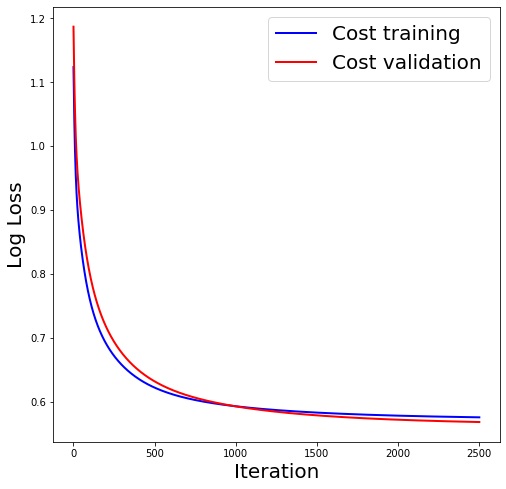

In [4]:

plt.figure(figsize=([8,8]))
plt.plot(axis, cost_train, 'b', label='Cost training', linewidth=2)
plt.plot(axis, cost_val, 'r', label='Cost validation', linewidth=2)
plt.legend(fontsize=20)
plt.ylabel('Log Loss',fontsize=20)
plt.xlabel('Iteration',fontsize=20)
plt.show()

Normalized confusion matrix
[[0.80218182 0.19781818]
 [0.4125     0.5875    ]]


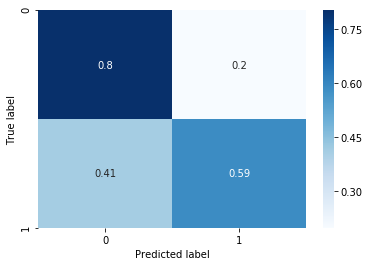

In [5]:
import seaborn as sns
norm = fx.norm_confusion_matrix(ytest, classified, normalize=True)

fig=sns.heatmap(norm, annot=True, cmap=plt.cm.Blues,yticklabels=['0','1'], xticklabels=['0','1'])
fig.set_yticks([0, 2]) 
fig.set_xticks([0.5, 1.5])
fig.set(xlabel='Predicted label', ylabel='True label')
plt.show()      


# Accuracy. 
Både egen kode og tester med scikit. 

In [6]:
classes = logreg.predict(xtrain)
print(100*np.sum(classes==ytrain)/len(classes),'% Training Accuracy')
print(f1_score(ytrain, classes))

classes = logreg.predict(xval)
print(100*np.sum(classes==yval)/len(classes),'% Validation Accuracy')
print(f1_score(yval, classes))


classes = logreg.predict(xtest)
print(100*np.sum(classes==ytest)/len(classes),'% Test Accuracy')
print(f1_score(ytest, classes))



69.99677037356012 % Training Accuracy
0.6618128867855843
71.08433734939759 % Validation Accuracy
0.6799999999999999
69.86817325800376 % Test Accuracy
0.6527777777777778


# Egen logistisk regresjon med stokastisk gradient descent

In [7]:
%matplotlib qt
import LogisticRegression as lr
Niter=2500
logreg = lr.LOGREG(eta=0.1, doplot = False, doprint=True)
cost_val, cost_train, axis = logreg.fit(xtrain, ytrain, xval, yval, Niter, solver='sgd', batch_size=500)
classified = logreg.predict(xtest)
%matplotlib inline

Cost validation = [1.36333031]
Cost validation = [1.33428452]
Cost validation = [1.30145464]
Cost validation = [1.26885439]
Cost validation = [1.2416056]
Cost validation = [1.21457106]
Cost validation = [1.18935639]
Cost validation = [1.16397957]
Cost validation = [1.14440944]
Cost validation = [1.12405224]
Cost validation = [1.10018453]
Cost validation = [1.0818271]
Cost validation = [1.06651206]
Cost validation = [1.04752267]
Cost validation = [1.03335057]
Cost validation = [1.02142873]
Cost validation = [1.00602455]
Cost validation = [0.99517343]
Cost validation = [0.98159791]
Cost validation = [0.97103235]
Cost validation = [0.96136135]
Cost validation = [0.95166895]
Cost validation = [0.94013092]
Cost validation = [0.93043942]
Cost validation = [0.92083785]
Cost validation = [0.91413279]
Cost validation = [0.90563228]
Cost validation = [0.89842658]
Cost validation = [0.89112057]
Cost validation = [0.88503222]
Cost validation = [0.87884729]
Cost validation = [0.87339391]
Cost valid

Cost validation = [0.59925151]
Cost validation = [0.59919937]
Cost validation = [0.59899113]
Cost validation = [0.59880829]
Cost validation = [0.59867903]
Cost validation = [0.59843001]
Cost validation = [0.59828265]
Cost validation = [0.59808523]
Cost validation = [0.59808635]
Cost validation = [0.5978625]
Cost validation = [0.59786385]
Cost validation = [0.59771625]
Cost validation = [0.59748423]
Cost validation = [0.59730554]
Cost validation = [0.59720473]
Cost validation = [0.59704268]
Cost validation = [0.59703813]
Cost validation = [0.59691159]
Cost validation = [0.59692206]
Cost validation = [0.59672574]
Cost validation = [0.596549]
Cost validation = [0.59645196]
Cost validation = [0.59622317]
Cost validation = [0.59606221]
Cost validation = [0.59581629]
Cost validation = [0.59570877]
Cost validation = [0.59560221]
Cost validation = [0.59554342]
Cost validation = [0.59542052]
Cost validation = [0.59533587]
Cost validation = [0.59521043]
Cost validation = [0.59515705]
Cost valida

Cost validation = [0.58060684]
Cost validation = [0.58059944]
Cost validation = [0.5805912]
Cost validation = [0.58065636]
Cost validation = [0.58048949]
Cost validation = [0.58040852]
Cost validation = [0.58035419]
Cost validation = [0.58026812]
Cost validation = [0.58019388]
Cost validation = [0.58019219]
Cost validation = [0.58016575]
Cost validation = [0.58009334]
Cost validation = [0.58007869]
Cost validation = [0.58009542]
Cost validation = [0.58007141]
Cost validation = [0.58001834]
Cost validation = [0.57993164]
Cost validation = [0.57978025]
Cost validation = [0.57977796]
Cost validation = [0.57981665]
Cost validation = [0.57974715]
Cost validation = [0.57960725]
Cost validation = [0.57954766]
Cost validation = [0.57944489]
Cost validation = [0.57949177]
Cost validation = [0.57956688]
Cost validation = [0.57956593]
Cost validation = [0.57938301]
Cost validation = [0.57934542]
Cost validation = [0.57938771]
Cost validation = [0.57939243]
Cost validation = [0.57936987]
Cost vali

Cost validation = [0.5728303]
Cost validation = [0.57289316]
Cost validation = [0.57284116]
Cost validation = [0.57279342]
Cost validation = [0.57291592]
Cost validation = [0.57294085]
Cost validation = [0.57280015]
Cost validation = [0.57277022]
Cost validation = [0.57266718]
Cost validation = [0.57269312]
Cost validation = [0.57272474]
Cost validation = [0.57267825]
Cost validation = [0.57272162]
Cost validation = [0.57269499]
Cost validation = [0.57275089]
Cost validation = [0.57267878]
Cost validation = [0.572719]
Cost validation = [0.57274091]
Cost validation = [0.57283047]
Cost validation = [0.57273354]
Cost validation = [0.57270026]
Cost validation = [0.57269133]
Cost validation = [0.57253863]
Cost validation = [0.57252321]
Cost validation = [0.57250454]
Cost validation = [0.57251174]
Cost validation = [0.57266237]
Cost validation = [0.57263844]
Cost validation = [0.57267215]
Cost validation = [0.57260754]
Cost validation = [0.57264227]
Cost validation = [0.57249273]
Cost valida

Cost validation = [0.56949992]
Cost validation = [0.56931561]
Cost validation = [0.56934086]
Cost validation = [0.56932282]
Cost validation = [0.56927869]
Cost validation = [0.56933055]
Cost validation = [0.56937114]
Cost validation = [0.56931298]
Cost validation = [0.56930777]
Cost validation = [0.56930283]
Cost validation = [0.56931904]
Cost validation = [0.56934304]
Cost validation = [0.56925298]
Cost validation = [0.56920591]
Cost validation = [0.56924598]
Cost validation = [0.56918115]
Cost validation = [0.56917494]
Cost validation = [0.56904815]
Cost validation = [0.56899934]
Cost validation = [0.56894072]
Cost validation = [0.56893693]
Cost validation = [0.56881008]
Cost validation = [0.56890602]
Cost validation = [0.56886297]
Cost validation = [0.56887193]
Cost validation = [0.56885156]
Cost validation = [0.56885149]
Cost validation = [0.56876243]
Cost validation = [0.5687212]
Cost validation = [0.56872464]
Cost validation = [0.56873753]
Cost validation = [0.56875346]
Cost vali

Cost validation = [0.56693718]
Cost validation = [0.56704722]
Cost validation = [0.56697748]
Cost validation = [0.56702561]
Cost validation = [0.56698204]
Cost validation = [0.56690933]
Cost validation = [0.56689874]
Cost validation = [0.56677402]
Cost validation = [0.56666655]
Cost validation = [0.5667048]
Cost validation = [0.56671746]
Cost validation = [0.56662994]
Cost validation = [0.56658479]
Cost validation = [0.56663621]
Cost validation = [0.56666073]
Cost validation = [0.56670584]
Cost validation = [0.56669469]
Cost validation = [0.56663141]
Cost validation = [0.56662993]
Cost validation = [0.56657453]
Cost validation = [0.56657199]
Cost validation = [0.56654665]
Cost validation = [0.56654887]
Cost validation = [0.56648941]
Cost validation = [0.56649007]
Cost validation = [0.56649978]
Cost validation = [0.56645035]
Cost validation = [0.56648673]
Cost validation = [0.56655394]
Cost validation = [0.56643321]
Cost validation = [0.56637887]
Cost validation = [0.56642675]
Cost vali

Cost validation = [0.56482178]
Cost validation = [0.56484983]
Cost validation = [0.5648757]
Cost validation = [0.56485214]
Cost validation = [0.56491012]
Cost validation = [0.56492209]
Cost validation = [0.56497396]
Cost validation = [0.56494796]
Cost validation = [0.56498689]
Cost validation = [0.56499442]
Cost validation = [0.56494581]
Cost validation = [0.564937]
Cost validation = [0.56498104]
Cost validation = [0.56504998]
Cost validation = [0.56500105]
Cost validation = [0.56494988]
Cost validation = [0.56488234]
Cost validation = [0.56491866]
Cost validation = [0.5649327]
Cost validation = [0.56485878]
Cost validation = [0.56488955]
Cost validation = [0.56487999]
Cost validation = [0.56486093]
Cost validation = [0.56475487]
Cost validation = [0.56488121]
Cost validation = [0.56487821]
Cost validation = [0.56476765]
Cost validation = [0.56476664]
Cost validation = [0.56475391]
Cost validation = [0.56475253]
Cost validation = [0.5648179]
Cost validation = [0.56480434]
Cost validati

Cost validation = [0.56372622]
Cost validation = [0.56377002]
Cost validation = [0.56384766]
Cost validation = [0.56386256]
Cost validation = [0.56383169]
Cost validation = [0.56390808]
Cost validation = [0.56395]
Cost validation = [0.56394419]
Cost validation = [0.56398322]
Cost validation = [0.5639345]
Cost validation = [0.56392006]
Cost validation = [0.563876]
Cost validation = [0.56383571]
Cost validation = [0.5637927]
Cost validation = [0.56375468]
Cost validation = [0.56374231]
Cost validation = [0.56381774]
Cost validation = [0.56384155]
Cost validation = [0.5638649]
Cost validation = [0.56386401]
Cost validation = [0.56398285]
Cost validation = [0.56388621]
Cost validation = [0.56383189]
Cost validation = [0.56393422]
Cost validation = [0.56399505]
Cost validation = [0.5640606]
Cost validation = [0.56406202]
Cost validation = [0.56405768]
Cost validation = [0.56402346]
Cost validation = [0.5640197]
Cost validation = [0.56396668]
Cost validation = [0.56399238]
Cost validation = 

Cost validation = [0.56300625]
Cost validation = [0.56291324]
Cost validation = [0.56281985]
Cost validation = [0.56275336]
Cost validation = [0.56274233]
Cost validation = [0.5627377]
Cost validation = [0.56272135]
Cost validation = [0.56269075]
Cost validation = [0.56263652]
Cost validation = [0.56258267]
Cost validation = [0.56255891]
Cost validation = [0.56257747]
Cost validation = [0.56257864]
Cost validation = [0.56258758]
Cost validation = [0.56261483]
Cost validation = [0.56265749]
Cost validation = [0.56256361]
Cost validation = [0.56251238]
Cost validation = [0.56246671]
Cost validation = [0.56252547]
Cost validation = [0.56267643]
Cost validation = [0.56264272]
Cost validation = [0.56262603]
Cost validation = [0.56262932]
Cost validation = [0.56258288]
Cost validation = [0.56265977]
Cost validation = [0.56272483]
Cost validation = [0.5626317]
Cost validation = [0.56270047]
Cost validation = [0.56265024]
Cost validation = [0.56266695]
Cost validation = [0.56263132]
Cost valid

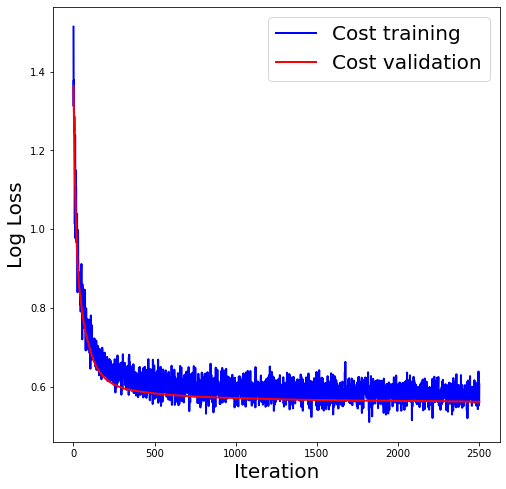

In [8]:
plt.figure(figsize=([8,8]))
plt.plot(axis, cost_train, 'b', label='Cost training', linewidth=2)
plt.plot(axis, cost_val, 'r', label='Cost validation', linewidth=2)
plt.legend(fontsize=20)
plt.ylabel('Log Loss',fontsize=20)
plt.xlabel('Iteration',fontsize=20)
plt.show()

Normalized confusion matrix
[[0.81454545 0.18545455]
 [0.41953125 0.58046875]]


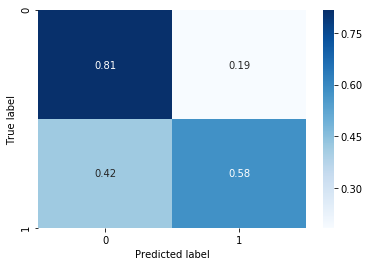

In [9]:
norm = fx.norm_confusion_matrix(ytest, classified, normalize=True)

fig=sns.heatmap(norm, annot=True, cmap=plt.cm.Blues,yticklabels=['0','1'], xticklabels=['0','1'])
fig.set_yticks([0, 2]) 
fig.set_xticks([0.5, 1.5])
fig.set(xlabel='Predicted label', ylabel='True label')
plt.show()     

In [10]:
classes = logreg.predict(xtrain)
print(100*np.sum(classes==ytrain)/len(classes),'% Training Accuracy')
print(f1_score(ytrain, classes))

classes = logreg.predict(xval)
print(100*np.sum(classes==yval)/len(classes),'% Validation Accuracy')
print(f1_score(yval, classes))


classes = logreg.predict(xtest)
print(100*np.sum(classes==ytest)/len(classes),'% Test Accuracy')
print(f1_score(ytest, classes))



70.16901711702013 % Training Accuracy
0.6627723013265181
70.85843373493977 % Validation Accuracy
0.6777685262281432
70.16949152542372 % Test Accuracy
0.6523266022827041


0.6975071022727273
1.0


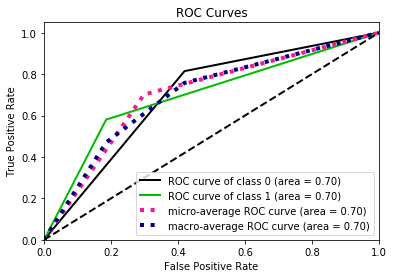

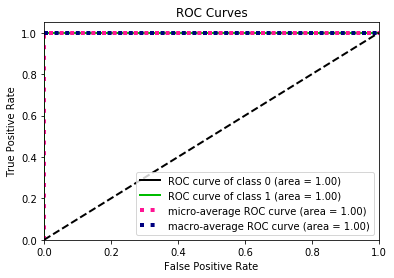

In [11]:
import scikitplot as skplt
from sklearn.metrics import roc_auc_score

y_probas = classified

y_probas = y_probas.flatten()
y_temp = np.zeros((y_probas.shape[0], 2))
y_temp[:,0] = 1-y_probas
y_temp[:,1] = y_probas 
#y_probas = y_temp



y_temp2 = np.zeros((y_probas.shape[0], 2))
y_temp2[:,0] = (1-ytest).ravel()
y_temp2[:,1] = ytest.ravel() 


ting=roc_auc_score(ytest, y_probas)
ting2=roc_auc_score(ytest, ytest)

print(ting)
print(ting2)

skplt.metrics.plot_roc(ytest, y_temp)
skplt.metrics.plot_roc(ytest, y_temp2)
# ikke surr mer med det her 

In [12]:
def bestCurve(y):
    defaults = sum(y == 1)
    total = len(y)
    x = np.linspace(0, 1, total)
    y1 = np.linspace(0, 1, defaults)
    y2 = np.ones(total-defaults)
    y3 = np.concatenate([y1,y2])
    return x, y3


In [13]:

model = LogisticRegression()
model.fit(xtrain, ytrain)
predicted_classes = model.predict(xtrain)
accuracy = accuracy_score(ytrain.flatten(),predicted_classes)
accuracy = accuracy * 100
parameters = model.coef_
log_loss(ytrain, predicted_classes)

print(accuracy, '% Training Accuracy')

predicted_classes = model.predict(xval)
accuracy = accuracy_score(yval.flatten(),predicted_classes)
accuracy = accuracy * 100
parameters = model.coef_
log_loss(yval, predicted_classes)

print(accuracy, '% Validation Accuracy')

predicted_classes = model.predict(xtest)
accuracy = accuracy_score(ytest.flatten(),predicted_classes)
accuracy = accuracy * 100
parameters = model.coef_
log_loss(ytest, predicted_classes)

print(accuracy, '% Test Accuracy')

C:\Users\vemundst\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vemundst\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


70.56733771127139 % Training Accuracy
71.6867469879518 % Validation Accuracy
70.4331450094162 % Test Accuracy


# C) 
Neural Network. 

In [3]:
epochs=1000
batch_size=int(len(ytrain)/20)
n_features=x.shape[1]
etavec = np.logspace(-6, -1, 6)
lmbvec = np.logspace(-6, -1, 6)
lmbvec[0]=0

activation = [lrf.relu, lrf.sigmoid, lrf.sigmoid]
derivative = [lrf.relu_deriv, lrf.sigmoid_deriv, lrf.sigmoid_deriv]

saved_net = np.zeros((len(etavec), len(lmbvec)), dtype=object)
train_accuracy = np.zeros((len(etavec), len(lmbvec)))
for i, etas in enumerate(etavec):
    for j, lmb in enumerate(lmbvec):
        np.random.seed(2019)
        neural_net = nn.ANN(lmb=lmb, bias=0, eta=etas,early_stop_tol = 0,\
                            early_stop_nochange=200, mode = 'classification', regularization = 'l1')            
        neural_net.add_layers(n_features=[91,50,20], n_neurons = [50,20,1] , n_layers=3)
        
        neural_net.train(epochs, batch_size, xtrain,ytrain,activation,derivative \
                         ,xval,yval, verbose=False)

        pred = neural_net.feed_out(xval, activation)
        val_loss[i,j] =  lrf.cost_log_ols(pred.ravel(),yval.T)
        val_f1[i,j] =  f1_score(yval, np.round(pred))
        
        print('Validation loss for', '\u03B7 =', etas, '&', '\u03BB =', lmb, '=', val_loss [i,j])
        


Validation loss for η = 1e-06 & λ = 0.0 = 0.7446535337997419
Validation loss for η = 1e-06 & λ = 1e-05 = 0.7446535311023768
Validation loss for η = 1e-06 & λ = 0.0001 = 0.7446535068260633
Validation loss for η = 1e-06 & λ = 0.001 = 0.7446532640607861
Validation loss for η = 1e-06 & λ = 0.01 = 0.7446508361931321
Validation loss for η = 1e-06 & λ = 0.1 = 0.7446265360643358
Validation loss for η = 1e-05 & λ = 0.0 = 0.744304156204272
Validation loss for η = 1e-05 & λ = 1e-05 = 0.744304130075551
Validation loss for η = 1e-05 & λ = 0.0001 = 0.7443038949150269
Validation loss for η = 1e-05 & λ = 0.001 = 0.7443015431084085
Validation loss for η = 1e-05 & λ = 0.01 = 0.7442780049329791
Validation loss for η = 1e-05 & λ = 0.1 = 0.7440406403752419
Validation loss for η = 0.0001 & λ = 0.0 = 0.7415079135098058
Validation loss for η = 0.0001 & λ = 1e-05 = 0.7415076963106993
Validation loss for η = 0.0001 & λ = 0.0001 = 0.7415057414248954
Validation loss for η = 0.0001 & λ = 0.001 = 0.7414861832749017

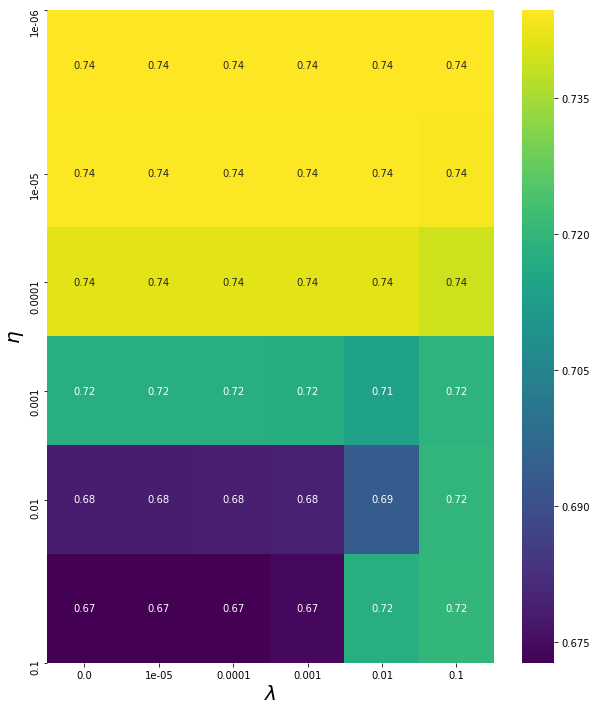

In [4]:
val_loss = train_accuracy


import seaborn as sns
train_accuracy[np.isnan(train_accuracy)]=2

yticklabels = etavec
xticklabels = lmbvec
fig, ax = plt.subplots(figsize = (10, 12))
sns.heatmap(val_loss, annot=True, ax=ax, cmap="viridis",\
            yticklabels=yticklabels, xticklabels=xticklabels)
#ax.set_title("Training Accuracy")
ax.set_ylabel("$\eta$", fontsize=20)
ax.set_xlabel("$\lambda$", fontsize=20)
tmp = np.arange(len(etavec))+0.5
tmp[0] = 0
tmp[-1]+=0.5
ax.set_yticks(tmp)
tmp = np.arange(len(lmbvec)) + 0.5
ax.set_xticks(tmp)
plt.show()

In [5]:
best_eta_index, best_lmb_index = np.where(val_loss == np.min(val_loss))
best_eta,best_lmb = etavec[best_eta_index], lmbvec[best_lmb_index] 

print('eta=',best_eta)
print('lmb=',best_lmb)

eta= [0.1]
lmb= [0.0001]


In [6]:
np.random.seed(2019)
epochs=1000
batch_size=int(len(ytrain)/20)
activation = [lrf.relu, lrf.sigmoid, lrf.sigmoid]
derivative = [lrf.relu_deriv, lrf.sigmoid_deriv, lrf.sigmoid_deriv]

neural_net = nn.ANN(lmb=best_lmb, bias=0, eta= best_eta,early_stop_tol = 0,\
                            early_stop_nochange=200, mode = 'classification', regularization = 'l1')            
neural_net.add_layers(n_features=[xtrain.shape[1],50,20], n_neurons = [50,20,1] , n_layers=3)
neural_net.train(epochs, batch_size, xtrain,ytrain,activation,derivative ,xtrain,ytrain, verbose=True)
cost_val, cost_train = neural_net.costs()
neural_net.coefs()

Epoch 1 loss 0.7430192277769776
Epoch 2 loss 0.7421451011791362
Epoch 3 loss 0.7411459605385927
Epoch 4 loss 0.7395058213925155
Epoch 5 loss 0.7379916402649555
Epoch 6 loss 0.7355781769392868
Epoch 7 loss 0.7333378949859034
Epoch 8 loss 0.7300084602835355
Epoch 9 loss 0.7254623337887368
Epoch 10 loss 0.7213776929810383
Epoch 11 loss 0.7189804564193896
Epoch 12 loss 0.7160398481721969
Epoch 13 loss 0.7129357298394691
Epoch 14 loss 0.7100127904786314
Epoch 15 loss 0.7092382417768159
Epoch 16 loss 0.706970610044976
Epoch 17 loss 0.7054517727649197
Epoch 18 loss 0.7044590661443033
Epoch 19 loss 0.70144163261416
Epoch 20 loss 0.7002334253387879
Epoch 21 loss 0.7002124142978892
Epoch 22 loss 0.6992679260910689
Epoch 23 loss 0.697723621510654
Epoch 24 loss 0.6966934324850088
Epoch 25 loss 0.6958156729985812
Epoch 26 loss 0.694889486682423
Epoch 27 loss 0.6934308968416886
Epoch 28 loss 0.6941448675280986
Epoch 29 loss 0.6935146834535667
Epoch 30 loss 0.6925871775633515
Epoch 31 loss 0.69141818

Epoch 247 loss 0.677485752142364
Epoch 248 loss 0.6772900940720324
Epoch 249 loss 0.677037207665361
Epoch 250 loss 0.6768362872283549
Epoch 251 loss 0.6769630781241509
Epoch 252 loss 0.6756306438900213
Epoch 253 loss 0.6756515886177202
Epoch 254 loss 0.6767008823429626
Epoch 255 loss 0.6758438646255478
Epoch 256 loss 0.6767952656727627
Epoch 257 loss 0.6765770795305737
Epoch 258 loss 0.676405810728386
Epoch 259 loss 0.6760707448763444
Epoch 260 loss 0.6769191966997377
Epoch 261 loss 0.6767630949512846
Epoch 262 loss 0.6759169472253866
Epoch 263 loss 0.6760864154959465
Epoch 264 loss 0.6763831971473858
Epoch 265 loss 0.6760946330487695
Epoch 266 loss 0.6764248460468967
Epoch 267 loss 0.6766888581509095
Epoch 268 loss 0.6765195469387446
Epoch 269 loss 0.6763272484199493
Epoch 270 loss 0.6771123521005986
Epoch 271 loss 0.6769671067426294
Epoch 272 loss 0.6756647698855367
Epoch 273 loss 0.6766152452620512
Epoch 274 loss 0.6758403810502369
Epoch 275 loss 0.676932200379185
Epoch 276 loss 0.6

Epoch 489 loss 0.6734852472116057
Epoch 490 loss 0.6736080969185985
Epoch 491 loss 0.6739993994223269
Epoch 492 loss 0.6737484760163364
Epoch 493 loss 0.6727923419216869
Epoch 494 loss 0.6732295790699734
Epoch 495 loss 0.6733118114119048
Epoch 496 loss 0.6744527214392427
Epoch 497 loss 0.6737994562431642
Epoch 498 loss 0.6742216894321866
Epoch 499 loss 0.6743244436544668
Epoch 500 loss 0.6748524088667573
Epoch 501 loss 0.6743394460321339
Epoch 502 loss 0.6736295473488331
Epoch 503 loss 0.6740695651943049
Epoch 504 loss 0.6747521222154161
Epoch 505 loss 0.6736488454169189
Epoch 506 loss 0.6734032664840225
Epoch 507 loss 0.6736958283770786
Epoch 508 loss 0.6725922176463444
Epoch 509 loss 0.6724713009011597
Epoch 510 loss 0.6737023220848013
Epoch 511 loss 0.6745544661985389
Epoch 512 loss 0.6740739847720965
Epoch 513 loss 0.6742526012805254
Epoch 514 loss 0.6739047531980833
Epoch 515 loss 0.6721006795147921
Epoch 516 loss 0.6734859927631265
Epoch 517 loss 0.6735652358782935
Epoch 518 loss

Epoch 731 loss 0.6732226172897908
Epoch 732 loss 0.6725747154591076
Epoch 733 loss 0.6717720713903622
Epoch 734 loss 0.6726201088730063
Epoch 735 loss 0.6723324226697737
Epoch 736 loss 0.6725836480394103
Epoch 737 loss 0.6718825308280033
Epoch 738 loss 0.6718025390476746
Epoch 739 loss 0.6724424140520042
Epoch 740 loss 0.6721645980321838
Epoch 741 loss 0.6719475738619463
Epoch 742 loss 0.6728337910304034
Epoch 743 loss 0.6727084659673942
Epoch 744 loss 0.6729025699682893
Epoch 745 loss 0.6717409791904544
Epoch 746 loss 0.6720926532578391
Epoch 747 loss 0.6725086718856872
Epoch 748 loss 0.6720229728892936
Epoch 749 loss 0.6716508171257414
Epoch 750 loss 0.6713376731359324
Epoch 751 loss 0.671751163555086
Epoch 752 loss 0.6715277650597852
Epoch 753 loss 0.6725073116178026
Epoch 754 loss 0.6721123024988825
Epoch 755 loss 0.6726710625959509
Epoch 756 loss 0.6727150659628638
Epoch 757 loss 0.6723765507343679
Epoch 758 loss 0.6715874169107264
Epoch 759 loss 0.6724052109611158
Epoch 760 loss 

{'w0': array([[-0.04256972,  0.63548782,  1.28003469, ..., -0.55270588,
          1.51344748, -0.34135883],
        [ 0.83088585, -0.50288527, -0.90069067, ..., -1.51306003,
          0.34413212, -1.07416577],
        [ 0.08431029,  0.27600161, -0.20018518, ...,  0.36853118,
          1.65046308,  0.21829011],
        ...,
        [ 0.06888645, -0.38717454,  2.13338123, ..., -0.32494141,
          0.86731898,  0.09756797],
        [ 2.04367237,  0.07901112,  1.55556076, ...,  1.65999182,
         -1.15055749,  0.19707221],
        [ 1.66703198, -1.74115492, -0.5554269 , ...,  0.22027406,
         -0.28937209, -0.77026878]]),
 'b0': array([-0.00394217, -0.08771201,  0.00062864, -0.13574385,  0.06468569,
         0.18993052, -0.02765063, -0.12453022, -0.0220331 ,  0.14694032,
         0.19131506,  0.07070132,  0.05723916,  0.27355643, -0.25711859,
        -0.06664279, -0.09545977,  0.03994757, -0.01948886,  0.05798128,
         0.15166472, -0.02926665,  0.02670884,  0.22737701,  0.031921

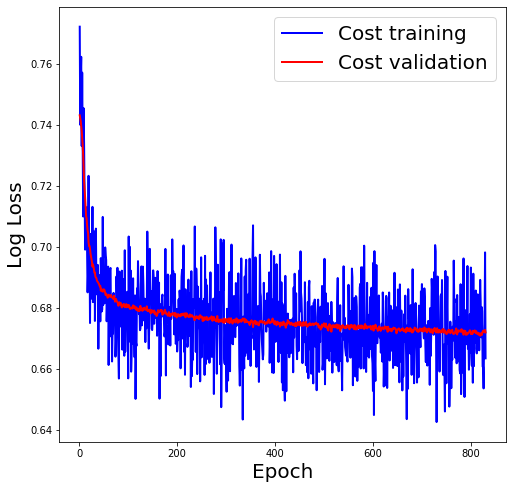

In [8]:
plt.figure(figsize=([8,8]))
axis = np.arange(len(cost_val))+1
plt.plot(axis, cost_train, 'b', label='Cost training', linewidth=2)
plt.plot(axis, cost_val, 'r', label='Cost validation', linewidth=2)
plt.legend(fontsize=20)
plt.ylabel('Log Loss',fontsize=20)
plt.xlabel('Epoch',fontsize=20)
plt.show()

Normalized confusion matrix
[[0.78472727 0.21527273]
 [0.41875    0.58125   ]]


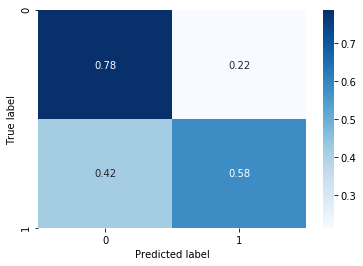

0.6413793103448276
68.66290018832392 % Test Accuracy


In [20]:
classified=np.round(neural_net.feed_out(xtest, activation))
norm = fx.norm_confusion_matrix(ytest, classified, normalize=True)
fig=sns.heatmap(norm, annot=True, cmap=plt.cm.Blues,yticklabels=['0','1'], xticklabels=['0','1'])
fig.set_yticks([0, 2]) 
fig.set_xticks([0.5, 1.5])
fig.set(xlabel='Predicted label', ylabel='True label')
plt.show() 
print(f1_score(ytest, classified))
print(100*np.sum(classified==ytest)/len(classified),'% Test Accuracy')


In [21]:
ting = fx.reshaper(5, ytrain)
print(ting[0].shape)
print(ting[1].shape)
print(ting[2].shape)
print(ting[3].shape)
print(ting[4].shape)


(1858, 1)
(1858, 1)
(1858, 1)
(1858, 1)
(1857, 1)


Normalized confusion matrix
[[0.81344902 0.18655098]
 [0.39025433 0.60974567]]


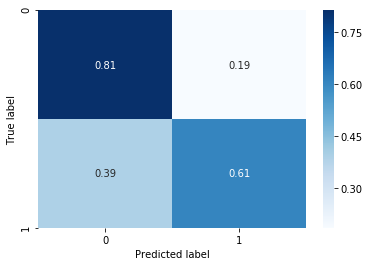

0.6799332697807435
71.08407794165142 % Test Accuracy


In [22]:
classified=np.round(neural_net.feed_out(xtrain, activation))
norm = fx.norm_confusion_matrix(ytrain, classified, normalize=True)
fig=sns.heatmap(norm, annot=True, cmap=plt.cm.Blues,yticklabels=['0','1'], xticklabels=['0','1'])
fig.set_yticks([0, 2]) 
fig.set_xticks([0.5, 1.5])
fig.set(xlabel='Predicted label', ylabel='True label')
plt.show() 
print(f1_score(ytrain, classified))
print(100*np.sum(classified==ytrain)/len(classified),'% Test Accuracy')


In [22]:
from sklearn.neural_network import MLPClassifier
# by default MLPClassifier employes l2 regularization


#print("Test set score: %f" % mlp.score(xtest, ytest))
epochs=1000
batch_size=500
n_features=x.shape[1]
etavec = np.logspace(-4, -1, 4)
lmbvec = np.logspace(-7, -3, 5)
lmbvec[0]=0


train_accuracy = np.zeros((len(etavec), len(lmbvec)))
for i, etas in enumerate(etavec):
    for j, lmb in enumerate(lmbvec):
        mlp = MLPClassifier(hidden_layer_sizes=(50,20,), max_iter=2000, alpha=lmb,
                    solver='sgd', verbose=0, tol=1e-4,batch_size=500, random_state=1,
                    learning_rate_init=etas)

        mlp.fit(xtrain, ytrain.ravel())
        print("Training set score: %f" % mlp.score(xval, yval))
        pred = mlp.predict(xval)
        train_accuracy[i,j] =  lrf.cost_log_ols(pred.ravel(),yval.T)
        print('Validation f1_score for', '\u03B7 =', etas, '&', '\u03BB =', lmb, '=', train_accuracy [i,j])



Training set score: 0.706325
Validation f1_score for η = 0.0001 & λ = 0.0 = 0.637097362413115
Training set score: 0.706325
Validation f1_score for η = 0.0001 & λ = 1e-06 = 0.637097362413115
Training set score: 0.706325
Validation f1_score for η = 0.0001 & λ = 1e-05 = 0.637097362413115
Training set score: 0.706325
Validation f1_score for η = 0.0001 & λ = 0.0001 = 0.637097362413115
Training set score: 0.706325
Validation f1_score for η = 0.0001 & λ = 0.001 = 0.637097362413115
Training set score: 0.718373
Validation f1_score for η = 0.001 & λ = 0.0 = 0.6274553591914801
Training set score: 0.718373
Validation f1_score for η = 0.001 & λ = 1e-06 = 0.6274553591914801
Training set score: 0.718373
Validation f1_score for η = 0.001 & λ = 1e-05 = 0.6274553591914801
Training set score: 0.718373
Validation f1_score for η = 0.001 & λ = 0.0001 = 0.6274553591914801
Training set score: 0.718373
Validation f1_score for η = 0.001 & λ = 0.001 = 0.6274553591914801
Training set score: 0.673946
Validation f1

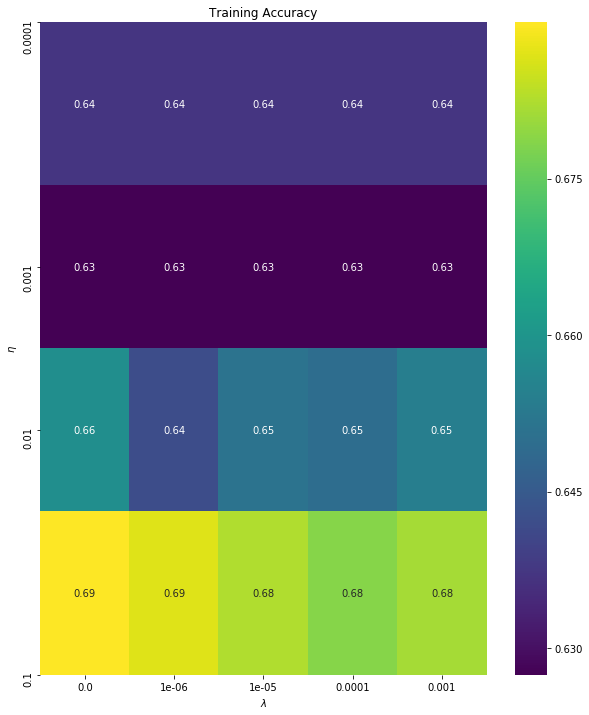

In [23]:
import seaborn as sns
train_accuracy[np.isnan(train_accuracy)]=2

yticklabels = etavec
xticklabels = lmbvec
fig, ax = plt.subplots(figsize = (10, 12))
sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="viridis",\
            yticklabels=yticklabels, xticklabels=xticklabels)
ax.set_title("Training Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
tmp = np.arange(len(etavec))+0.5
tmp[0] = 0
tmp[-1]+=0.5
ax.set_yticks(tmp)
tmp = np.arange(len(lmbvec)) + 0.5
ax.set_xticks(tmp)
plt.show()

In [24]:
pred = mlp.predict(xtest)
accuracy = accuracy_score(ytest.flatten(),pred)
accuracy = accuracy * 100
print(accuracy)
print(f1_score(ytest, pred)) 

cm = confusion_matrix(ytest , pred)
print(cm)

66.17702448210923
0.6801994301994302
[[802 573]
 [325 955]]


In [25]:
pred = mlp.predict(xtrain)
accuracy = accuracy_score(ytrain.flatten(),pred)
accuracy = accuracy * 100
print(accuracy)

cm = confusion_matrix(ytrain , pred)
print(cm)

75.83162880826785
[[3137 1473]
 [ 772 3907]]


# Cancer data

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

xtrain,ytrain = load_breast_cancer(return_X_y=True)
scaler = MinMaxScaler()
indx = np.arange(xtrain.shape[1])
scaler.fit(xtrain[:,indx])
xtrain = scaler.transform(xtrain[:,indx])
ytrain=ytrain.reshape([len(ytrain),1])